In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
#regression case study

In [3]:
houses = pd.read_csv("kc_house_data.csv")
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
houses.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

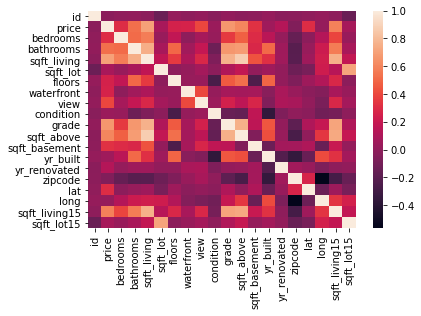

In [8]:
corr = houses.corr()
sns.heatmap(corr)
#no multicollinearity

In [9]:
#create independent variables data
feature_cols = ['sqft_living','grade','sqft_above','sqft_living15',"bathrooms",'view'] 
x = houses[feature_cols]
y = houses.price

In [10]:
x.head()
#independent

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view
0,1180,7,1180,1340,1.00,0
1,2570,7,2170,1690,2.25,0
2,770,6,770,2720,1.00,0
3,1960,7,1050,1360,3.00,0
4,1680,8,1680,1800,2.00,0


In [11]:
y.head()
#dependent

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(17290, 6)
(4323, 6)
(17290,)
(4323,)


In [14]:
linereg = LinearRegression()

In [16]:
linereg.fit(X_train,Y_train)

LinearRegression()

In [17]:
#predict
linereg.predict(np.array([[1000,5,1000,1000,2,1]]))


array([145235.41485423])

In [20]:
mse = mean_squared_error(Y_test,linereg.predict(X_test))
print(mse)
print(np.sqrt(mse))
#huge error in first value
#RMSE value in second value it is same representation as first value

56231422964.182236
237131.65744830915


In [21]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,linereg.predict(X_test))
print(mae)

155388.08082227706


In [23]:
#r2 score
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, linereg.predict(X_test))
print(r2)
#not good score

0.5972197669434216


In [24]:
#accuracy or score of model
print(linereg.score(X_test,Y_test))

0.5972197669434216


In [ ]:
#if number of details is less then model becomes simple where it is biased
#underfitting is happening now as error value is high
#model is very simple because not many features avalable

In [ ]:
#how to divide data differently so we can get another type of training data and get a new accuracy


In [27]:
#cross validation score
#see effect on score if we use multiple instances of division of data into training and testing
scores = cross_val_score(linereg,x,y,cv = 10)
scores
#divide data into 10 folds cv=10
#and one of them will be testing dataset and the remaining 9 will be training dataset
#remaining 9 will be merged into one data set and a new chunk of data will be taken from your training dataset will be taken as testing dataset


#increasing or decreasing cv causes bias variance tradeoff
#high bias model undefits
#high variance model overfits
#dont go for both
#cv 10 is an optimal value for medium variance and bias

array([0.56767341, 0.56443135, 0.54929598, 0.57714848, 0.53057789,
       0.57774814, 0.58128714, 0.59976637, 0.58498765, 0.58636835])

In [28]:
scores.max()

0.5997663744788428

In [30]:
type(scores)

numpy.ndarray

In [31]:
y_pred = linereg.predict(X_test)

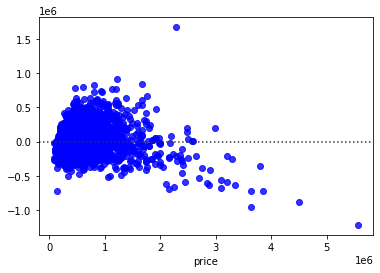

In [38]:
sns.residplot(x=Y_test, y = y_pred, color = "b")

In [ ]:
#this is linear in fashion and a proper regressor is applied on this

In [39]:
#these are not contributing to the target variables
houses.drop(['id','date','zipcode'],axis = 1, inplace = True)

In [40]:
x = houses.drop('price',axis = 1, inplace=False)
y = houses.price

In [41]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [42]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [48]:
x_train,y_train,y_test,x_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(17290, 17)
(4323,)
(17290,)
(4323, 17)


In [51]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [17290, 4323]

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,linreg.predict(x_test))
print(mae)
print(np.sqrt(mae))

In [52]:
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test,linreg.predict(x_test))
print(mse)
print(np.sqrt(mse))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [53]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, linreg.predict(x_test))
print(r2)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [54]:
print(linreg.score(x_test,y_test))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [56]:
#cross validation score
scores = cross_val_score(linreg, x,y, cv=10)
scores

array([0.69220712, 0.69346393, 0.68362091, 0.68860914, 0.67797598,
       0.69790231, 0.70777426, 0.70216492, 0.69660973, 0.66860173])

In [57]:
scores.max()

0.70777425705021

In [58]:
y_pred = linreg.predict(x_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [59]:
sns.residplot(x=y_test,y=y_pred,color="g")

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 17290 and the array at index 1 has size 4323

In [ ]:
#classification case study

In [60]:
data = pd.read_csv("heart.xls")

In [61]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [64]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

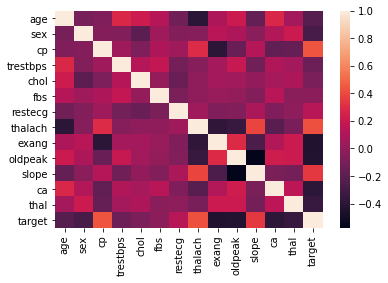

In [65]:
corr = data.corr()
sns.heatmap(corr)

In [66]:
#feature selection
#create x and y
feature_cols = ['cp','thalach','slope']
x = data[feature_cols]
y = data.target

In [67]:
x.head()

,cp,thalach,slope
0,3,150,0
1,2,187,0
2,1,172,2
3,1,178,2
4,0,163,2


In [68]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [69]:
xtrain,ytrain,xtest,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#underfitting and we have less number of features and low record of data

In [70]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(242, 3)
(242,)
(61, 3)
(61,)


In [76]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

ValueError: y should be a 1d array, got an array of shape (61, 3) instead.

In [78]:
data[data['target']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [79]:
from sklearn import metrics
cm = metrics.confusion_matrix(ytest, logreg.predict(xtest))
print(cm)
#confusion matrix values

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.